In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils


###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [2]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices['Date'] = pd.to_datetime(system_prices['Date'])
system_prices.set_index('Date')
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


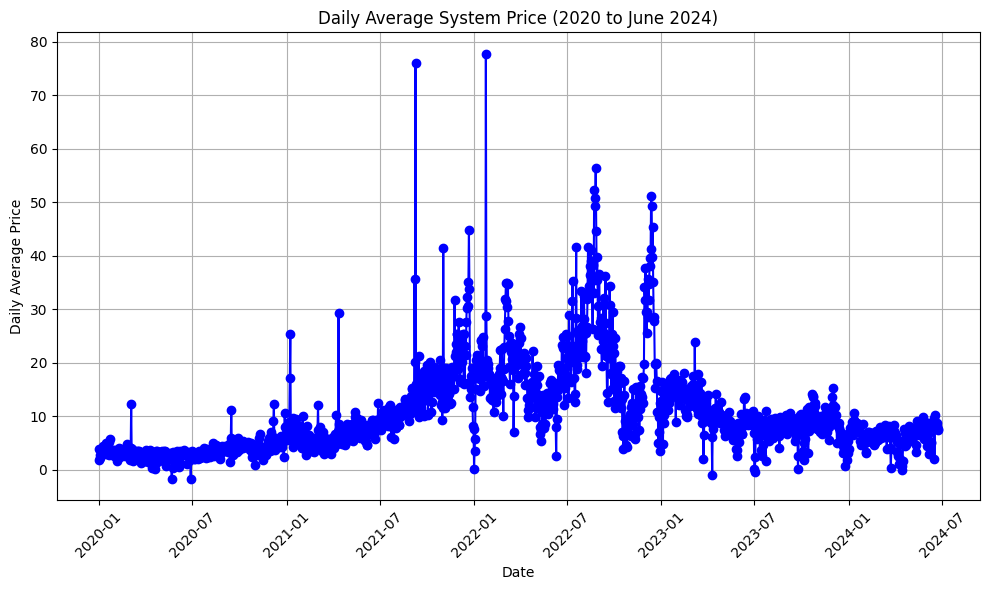

In [3]:
# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices['Date'], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Average System Price (2020 to June 2024)')
plt.xlabel('Date')
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [4]:
def plot_data_for_date_range(data, start_date, end_date,plot=True):
    # Assuming 'system_prices' is your DataFrame
    system_prices['Date'] = pd.to_datetime(system_prices['Date'])

    # Filter the data within the date range
    mask = (system_prices['Date'] >= start_date) & (system_prices['Date'] <= end_date)
    filtered_data = system_prices.loc[mask]

    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    std_dev = filtered_data['Daily average'].std()

    # Identify data points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    if plot:
        # Plot the daily average system price for the filtered date range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data['Date'], filtered_data['Daily average'], linestyle='-', color='b')

        # Highlight regions outside 1 standard deviation
        plt.fill_between(filtered_data['Date'], mean_price - std_dev, mean_price + std_dev, color='yellow', alpha=0.3)

        # Highlight regions outside 2 standard deviations
        plt.fill_between(filtered_data['Date'], mean_price - 2 * std_dev, mean_price + 2 * std_dev, color='red', alpha=0.3)

        # Customize the plot
        plt.title(f'Daily Average System Price from {start_date} to {end_date}')
        plt.xlabel('Date')
        plt.ylabel('Daily Average Price')
        plt.grid(True)
        plt.xticks(rotation=45)

        # Show plot
        plt.tight_layout()
        plt.show()


    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    median_price = filtered_data['Daily average'].median()
    variance_price = filtered_data['Daily average'].var()
    std_dev = filtered_data['Daily average'].std()
    min_price = filtered_data['Daily average'].min()
    max_price = filtered_data['Daily average'].max()

    # Calculate the number of points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    
    num_one_std_dev_outliers = one_std_dev_outliers.shape[0]
    num_two_std_dev_outliers = two_std_dev_outliers.shape[0]

    total_points = filtered_data.shape[0]
    pct_one_std_dev_outliers = (num_one_std_dev_outliers / total_points) * 100
    pct_two_std_dev_outliers = (num_two_std_dev_outliers / total_points) * 100

    # Print the descriptive statistics
    print(f'Descriptive Statistics from {start_date} to {end_date}:')
    print(f'Mean: {mean_price}')
    print(f'Median: {median_price}')
    print(f'Variance: {variance_price}')
    print(f'Minimum: {min_price}')
    print(f'Maximum: {max_price}')
    print(f'Number of points outside 1 standard deviation: {num_one_std_dev_outliers} ({pct_one_std_dev_outliers:.2f}%)')
    print(f'Number of points outside 2 standard deviations: {num_two_std_dev_outliers} ({pct_two_std_dev_outliers:.2f}%)')

    # Prepare dictionary with descriptive statistics and outlier information
    statistics_dict = {
        'start_date': start_date,
        'end_date': end_date,
        'mean_price': mean_price,
        'median_price': median_price,
        'variance_price': variance_price,
        'std_deviation': std_dev,
        'min_price': min_price,
        'max_price': max_price,
        'num_outliers_1_std_dev': num_one_std_dev_outliers,
        'pct_outliers_1_std_dev': pct_one_std_dev_outliers,
        'num_outliers_2_std_dev': num_two_std_dev_outliers,
        'pct_outliers_2_std_dev': pct_two_std_dev_outliers
    }

    return statistics_dict    


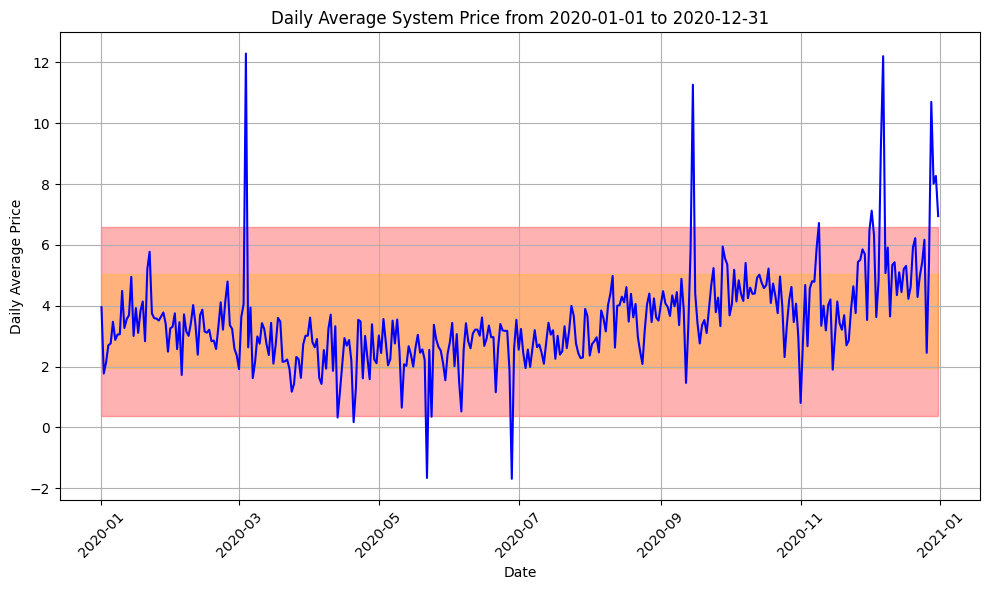

Descriptive Statistics from 2020-01-01 to 2020-12-31:
Mean: 3.494478142076503
Median: 3.3355
Variance: 2.408568085822292
Minimum: -1.691
Maximum: 12.289
Number of points outside 1 standard deviation: 69 (18.85%)
Number of points outside 2 standard deviations: 15 (4.10%)


{'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'mean_price': 3.494478142076503,
 'median_price': 3.3355,
 'variance_price': 2.408568085822292,
 'std_deviation': 1.551956212598246,
 'min_price': -1.691,
 'max_price': 12.289,
 'num_outliers_1_std_dev': 69,
 'pct_outliers_1_std_dev': 18.852459016393443,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.098360655737705}

In [5]:
plot_data_for_date_range(system_prices,'2020-01-01', '2020-12-31')

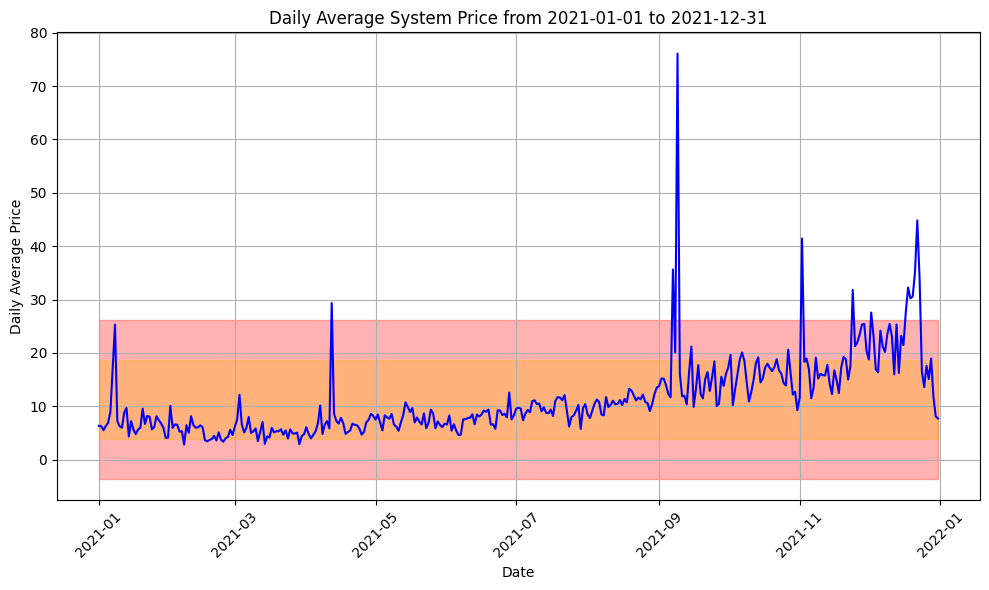

Descriptive Statistics from 2021-01-01 to 2021-12-31:
Mean: 11.248369863013698
Median: 9.144
Variance: 54.937008464473884
Minimum: 2.827
Maximum: 76.078
Number of points outside 1 standard deviation: 54 (14.79%)
Number of points outside 2 standard deviations: 13 (3.56%)


{'start_date': '2021-01-01',
 'end_date': '2021-12-31',
 'mean_price': 11.248369863013698,
 'median_price': 9.144,
 'variance_price': 54.937008464473884,
 'std_deviation': 7.411950381948997,
 'min_price': 2.827,
 'max_price': 76.078,
 'num_outliers_1_std_dev': 54,
 'pct_outliers_1_std_dev': 14.794520547945206,
 'num_outliers_2_std_dev': 13,
 'pct_outliers_2_std_dev': 3.5616438356164384}

In [6]:
plot_data_for_date_range(system_prices,'2021-01-01', '2021-12-31')

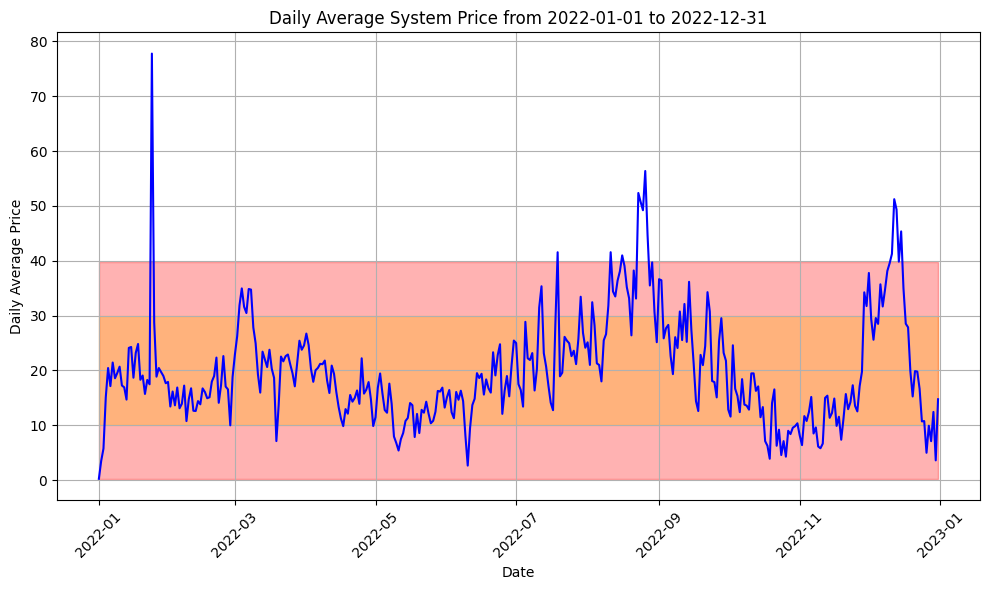

Descriptive Statistics from 2022-01-01 to 2022-12-31:
Mean: 20.008887671232877
Median: 18.006
Variance: 97.56512746811683
Minimum: 0.236
Maximum: 77.79
Number of points outside 1 standard deviation: 95 (26.03%)
Number of points outside 2 standard deviations: 15 (4.11%)


{'start_date': '2022-01-01',
 'end_date': '2022-12-31',
 'mean_price': 20.008887671232877,
 'median_price': 18.006,
 'variance_price': 97.56512746811683,
 'std_deviation': 9.877506136070826,
 'min_price': 0.236,
 'max_price': 77.79,
 'num_outliers_1_std_dev': 95,
 'pct_outliers_1_std_dev': 26.027397260273972,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.10958904109589}

In [7]:
plot_data_for_date_range(system_prices,'2022-01-01', '2022-12-31')

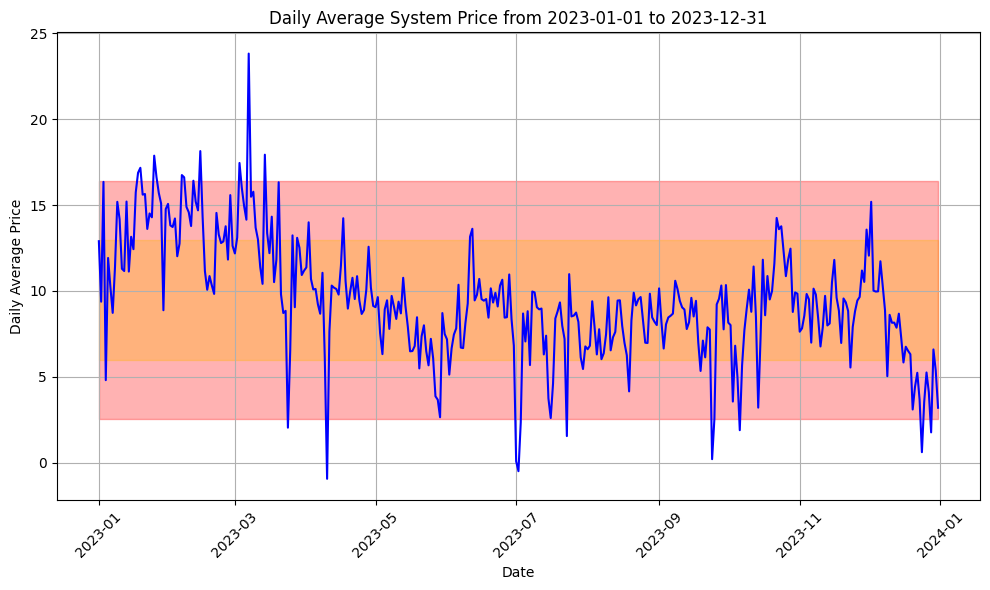

Descriptive Statistics from 2023-01-01 to 2023-12-31:
Mean: 9.469106849315068
Median: 9.269
Variance: 12.055958716573835
Minimum: -0.934
Maximum: 23.818
Number of points outside 1 standard deviation: 102 (27.95%)
Number of points outside 2 standard deviations: 21 (5.75%)


{'start_date': '2023-01-01',
 'end_date': '2023-12-31',
 'mean_price': 9.469106849315068,
 'median_price': 9.269,
 'variance_price': 12.055958716573835,
 'std_deviation': 3.472169165892387,
 'min_price': -0.934,
 'max_price': 23.818,
 'num_outliers_1_std_dev': 102,
 'pct_outliers_1_std_dev': 27.945205479452056,
 'num_outliers_2_std_dev': 21,
 'pct_outliers_2_std_dev': 5.7534246575342465}

In [8]:
plot_data_for_date_range(system_prices,'2023-01-01', '2023-12-31')

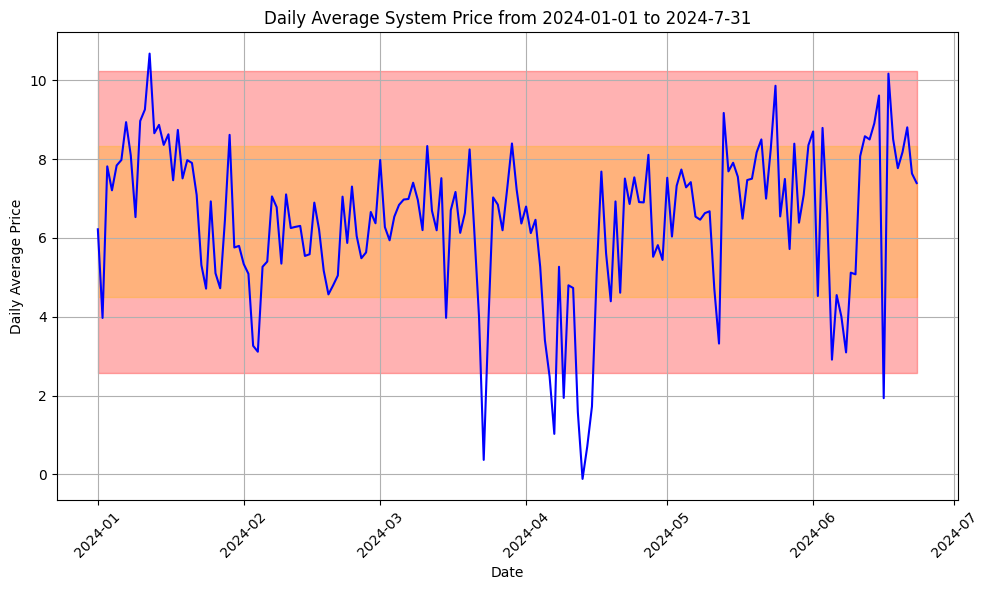

Descriptive Statistics from 2024-01-01 to 2024-7-31:
Mean: 6.412742857142857
Median: 6.677
Variance: 3.6673070197044324
Minimum: -0.112
Maximum: 10.677
Number of points outside 1 standard deviation: 47 (26.86%)
Number of points outside 2 standard deviations: 10 (5.71%)


{'start_date': '2024-01-01',
 'end_date': '2024-7-31',
 'mean_price': 6.412742857142857,
 'median_price': 6.677,
 'variance_price': 3.6673070197044324,
 'std_deviation': 1.9150214149466926,
 'min_price': -0.112,
 'max_price': 10.677,
 'num_outliers_1_std_dev': 47,
 'pct_outliers_1_std_dev': 26.857142857142858,
 'num_outliers_2_std_dev': 10,
 'pct_outliers_2_std_dev': 5.714285714285714}

In [9]:
plot_data_for_date_range(system_prices,'2024-01-01', '2024-7-31')

## Six Months Prediction

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=767.382, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=745.262, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=725.050, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=765.406, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=723.555, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=724.999, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=721.428, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=723.130, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=723.150, Time=0.11 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=744.085, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=722.690, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=72

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


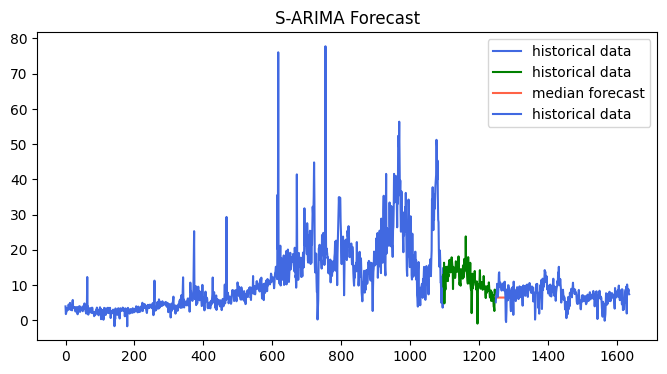

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


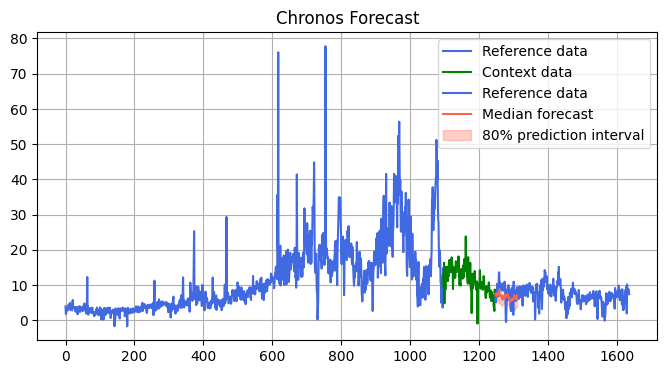

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


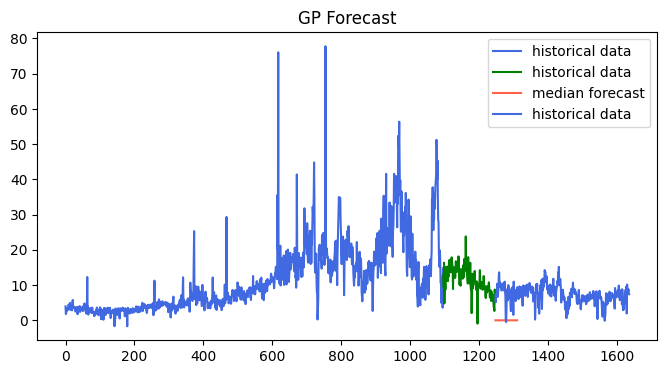

--- RESULTS --- 
 Using Mean Squared Error (MSE) as performance metric
 MSE = (1/n) * sum((y_true - y_pred)^2) 
-----------------
sarima_mse    9.099176432717707
chronos_mse   8.06441785183742
gp_mse        69.4213835769447
-----------------


In [10]:
start = '2023-01-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## One Year Context Prediction

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2212.322, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2195.764, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2186.582, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2210.329, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2184.696, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2186.587, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2188.564, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2174.131, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2175.869, Time=0.19 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2175.846, Time=0.24 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2177.651, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2193.975, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2176.117, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2176.117, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


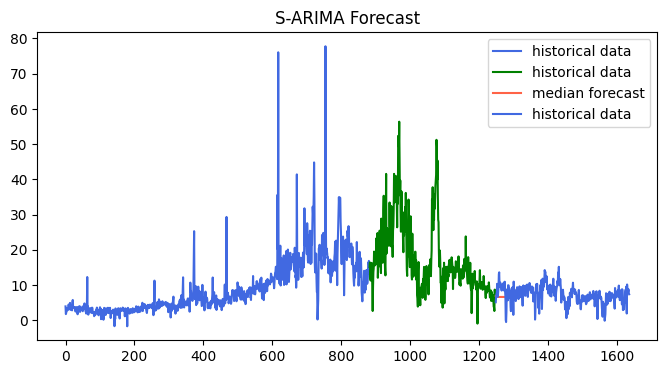

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


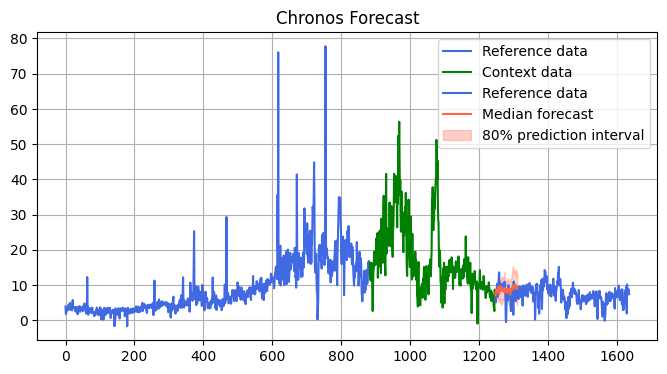

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


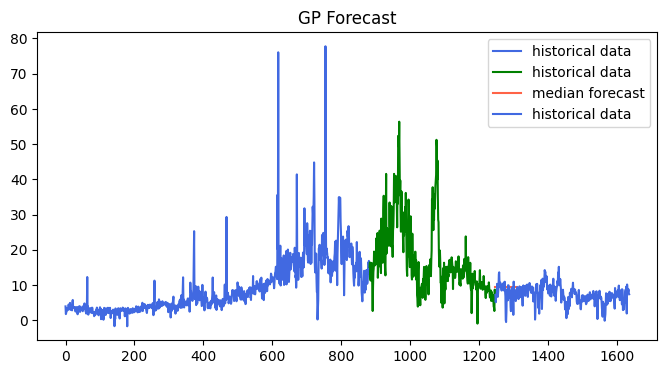

--- RESULTS --- 
 Using Mean Squared Error (MSE) as performance metric
 MSE = (1/n) * sum((y_true - y_pred)^2) 
-----------------
sarima_mse    8.653385495234991
chronos_mse   7.722418404849506
gp_mse        9.554876224109659
-----------------


In [11]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Year Context Comparison

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4762.414, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4665.129, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4618.476, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4760.414, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4617.978, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=4618.631, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=4619.847, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4602.758, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=4603.086, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=4602.885, Time=0.83 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=4603.992, Time=1.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4663.959, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=4601.204, Time=0.14 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=4601.915, Time=0.60 sec
 ARIMA(2,1,1)(0,0,1

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


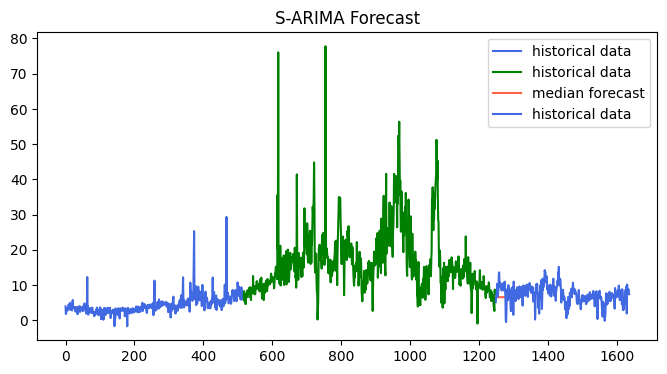

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


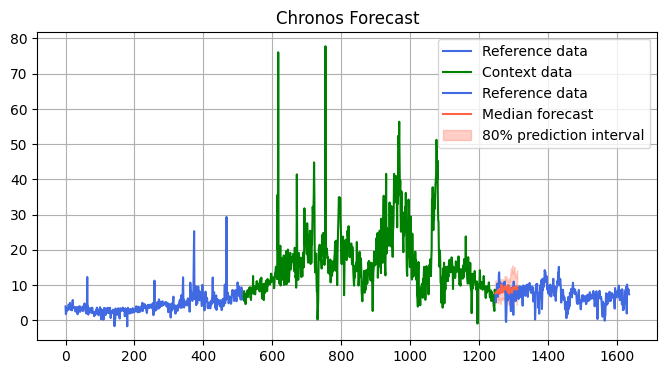

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


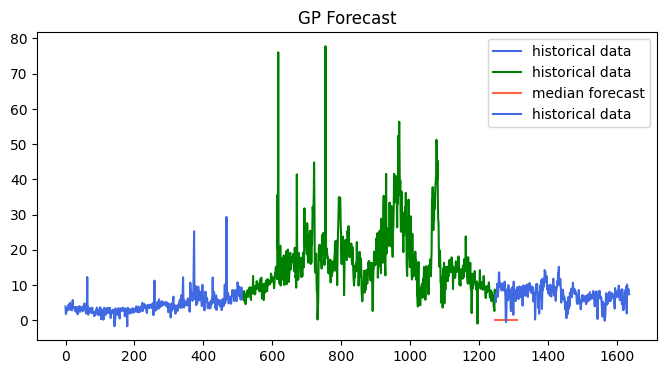

--- RESULTS --- 
 Using Mean Squared Error (MSE) as performance metric
 MSE = (1/n) * sum((y_true - y_pred)^2) 
-----------------
sarima_mse    8.81496046623615
chronos_mse   8.567545108967325
gp_mse        69.4189505
-----------------


In [12]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Year Context

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6783.350, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6636.164, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6560.176, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6781.350, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6560.596, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=6561.290, Time=0.82 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=6559.977, Time=1.26 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=6561.646, Time=2.31 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=6561.173, Time=3.86 sec
 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=6562.738, Time=7.09 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=6785.186, Time=0.92 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=6533.234, Time=1.94 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=6533.761, Time=0.86 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=6535.075, Time=3.77 sec
 ARIMA(1,1,1)(0,0,3

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97940D+00    |proj g|=  5.61243D-02

At iterate    5    f=  2.97358D+00    |proj g|=  6.76858D-03

At iterate   10    f=  2.97328D+00    |proj g|=  2.76521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   4.727D-06   2.973D+00
  F =   2.9732719411581305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


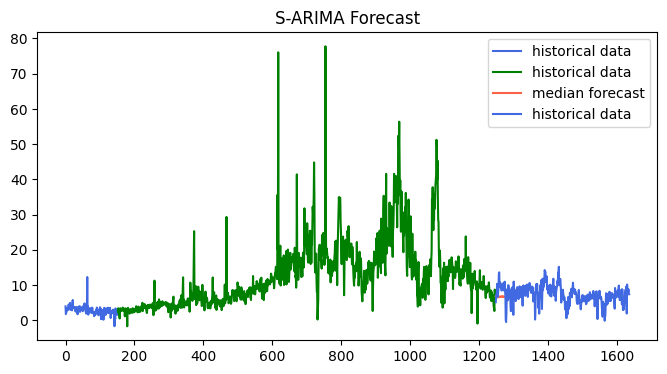

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


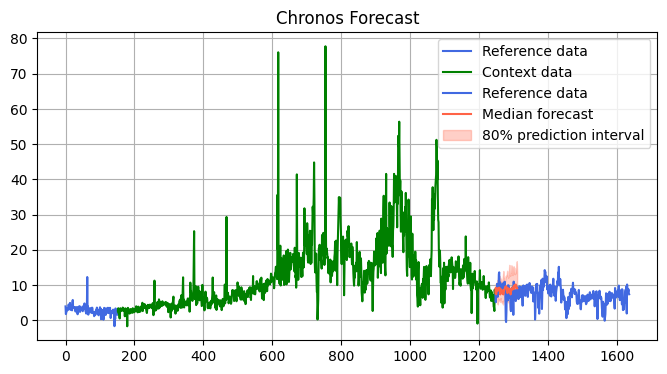

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


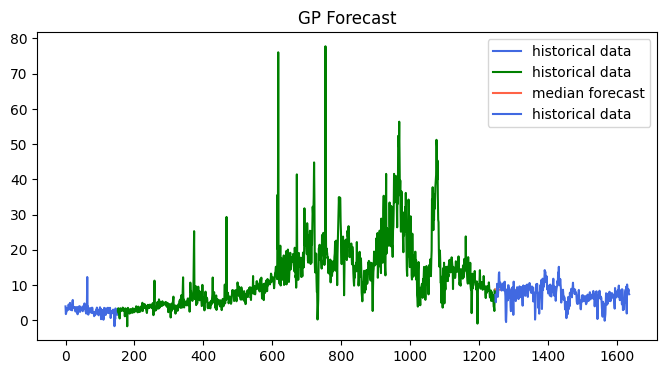

--- RESULTS --- 
 Using Mean Squared Error (MSE) as performance metric
 MSE = (1/n) * sum((y_true - y_pred)^2) 
-----------------
sarima_mse    8.526424178792391
chronos_mse   8.67963541626741
gp_mse        7.406577389682001
-----------------


In [13]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Next steps 

- Fine tune
- Move context window around and get histogram of error 
- See how to extract attention weights
